In [1]:
%pylab inline

import numpy as np
from matplotlib import pyplot as plt

Populating the interactive namespace from numpy and matplotlib


# General Dynamical Models

Consider a dynamical model in the most general form:

$ \begin{matrix}
    \dot{x}_1 & = & f_1(t_1 x_1, \dots, x_n; u_1, \dots, u_p) \\
    \vdots & & \\
    \dot{x}_n & = & f_n(t_1 x_1, \dots, x_n; u_1, \dots, u_p) \\
\end{matrix} \quad \Rightarrow \quad
\underline{\dot{x}} = \underline{f}(t, \underline{x}; \underline{u}) \quad \text{ where } \, \underline{x} \in \mathbb{R}^n, \, \underline{u} \in \mathbb{R}^p
$

Here, the system solution $\underline{x}(t)$ (state) is represented by a set of $n$-first order non-linear equations.  $\underline{x}(t)$ is the state of the system and $\underline{u}(t)$ is the input (control & disturbances) of the system.  

Sometimes the state of the system cannot be measured.  The following output equation is therefore considered:

$
\begin{cases}
    \underline{\dot{x}} = \underline{f}(t, \underline{x}, \underline{u}) \\
    \underline{y} = \underline{h}(t, \underline{x}, \underline{u}) \\
\end{cases}
\quad \text{ where the output is } \underline{y} \in \mathbb{R}^p
$

From the general form, the following special cases can be derived:

1. Linear Systems (Time Variant)
    
    $\begin{matrix} 
        \begin{split} 
            \underline{\dot{x}} = A(t)\underline{x} + B(t)\underline{u} & where & A(t) \in \mathbb{M}(n \times m) \\
            \underline{\dot{y}} = C(t)\underline{x} = D(t) \underline{v} & & B(t) = \mathbb{M}(n \times p)
        \end{split} 
        &
        where
        &
        \begin{split}
            A(t) \in M(n \times m) \\
            B(t) \in M(n \times p) \\
            C(t) = M(q \times n) \\
            D(t) = M(q \times p)
        \end{split}
    \end{matrix}
    $
    
2. Unforced State Equations

    $\begin{cases}
        \underline{\dot{x}} = \underline{f}(t, \underline{x}) \\
        \underline{y} = \underline{h}(t, \underline{x})\\
    \end{cases} \rightarrow $ generally resulting from $\underline{u} = \phi(t, \underline{x})$ (for example from feedback)
    
3. Autonomous Systems

    $\begin{cases}
        \underline{\dot{x}} = \underline{f}(\underline{x}) \\
        \underline{y} = \underline{h}(\underline{x})
    \end{cases} \Rightarrow \text{ Linear Case } \begin{cases}
        \underline{\dot{x}} = A \underline{x} \\
        \underline{y} = C \underline{x}
    \end{cases}$
    
4. Time Invariant (TI) Systems

    A TI state model has the porperty that shifting the initial time form $t_0 \rightarrow t_0 + a$ and provided that the input waveform is applied to $t_0 + a$, the solution will not change (Time Invariance):
    
    $\underline{\dot{x}} = \underline{f}(\underline{x}, \underline{u})$
    
    $\underline{y} = \underline{h}(\underline{x}, \underline{u})$

# Existense and Uniqueness of the Solution

**Definition:** A function $\underline{f}(t, \underline{x})$ is $\underline{\text{piecewise continuous}}$ in $t$ over an interval $J \in \mathbb{R}$ if, for every bounded subinterval $J_0 \in J$, $f$ is continous in $t$ for all $t \in J_0$ except for at most a finite number of points where $f$ may have finite-jump discontinuities:

## !!!!! TODO:INSERT GRAPHICS !!!!!

**Definition:** A function $\underline{f}(t, \underline{x})$ is locally $\underline{\text{Lipshitz}}$ in $\underline{x}$ at a point $\underline{x}_0$ if there exists a neighborhood $N(\underline{x}_0, r) = \lbrace \underline{x} \in \mathbb{R}^n \, | \, \|\underline{x} = \underline{x}_0\| < r \rbrace$ where $\underline{f}(t, \underline{x})$ statisfies the $\underline{\text{Lipschitz Condition}}$, i.e.:

$\| \underline{f}(t, \underline{x}) - \underline{f}(t, \underline{y})\| \, \le L\, \| \underline{x} - \underline{y} \|,\, L > 0$

A function $\underline{f}(t, \underline{x})$ is locally Lipschitz in $\underline{x}$ on a domain $D \in \mathbb{R}^n$ (open and connected) if it is locally Lipshitz at $\forall \underline{x}_0 \in D$

Interpretation: Let $n = 1 \Rightarrow$ Lipshitz Condition implies:

## !!!! TODO:INSERT GRAPHICS !!!!!

* Any $f(x)$ that has an infinite slope at some point is not locally Lipshitz at that point
* A discontinuous function is not locally Lipshitz at the point of dicontinuity

## Example:

$f(x) = x^{1/3}$ is not locally Lipshitz at $x=0$.  This is becuase $f'(x) = 1/3 x^{-2/3} \rightarrow \infty$ as $x \rightarrow 0$ (slope of $\infty$).  However $f(x)$ is locally Lipshitz at any $x_0 \neq 0$ becuase $f'(x_0)$ is bounded by a constant $k \Rightarrow$ Lipshitz with $k=L$.

## More General Statement:

If for $t \in J \subset \mathbb{R}$ and $\underline{x}$ in a domain $D \subset \mathbb{R}^n$, $\underline{f}(t, \underline{x})$ and partial derviative $\frac{\partial f_i}{\partial x_j}$ are continous, then $\underline{f}(t, \underline{x})$ is locally Lipshitz in $\underline{x}$ on $D$.  

Consider now the non-Autonomous system:

$\underline{\dot{x}} = \underline{f}(t, \underline{x})$ where $\underline{f}(t, \underline{x})$ is a piecewise continuous function in $t$ and locally Lipshitz in $\underline{x}$ at $\underline{x_0}$ then, there is a $\partial > 0$ such that the state equation with $\underline{x}(t_0) = x_0$ has a unique solution over $[t, t + \partial]$ (Theorem of Existence and Uniqueness of the Solution)

This theorem is a local result and garantees the existence and uniqueness of the solution in a local interval $[t, t+\partial] \rightarrow$ solution may cease to exist after a certain point.

Lipshitz Condition is critical to ensure uniqueness.  Indeed consider the following:

$\begin{cases}
    \dot{x} = u^{1/3} \\
    x(0) = x_0 = 0
\end{cases} \rightarrow$ solve by seperation of variables $\frac{\partial x}{x^{1/3}} = \partial t$

$\int_{x_0}^x \frac{\partial x}{x^{1/3}} = \int_0^t \partial t \Rightarrow 3/2 x^{2/3} |_{x_0}^x = t \Rightarrow x^{2/3} - x_0^{2/3} = 2/3 t$

for $x_0 \Rightarrow x(t) = (2/3 t)^{3/2} \rightarrow$ however $x(t) = 0$ is also an admissible solution $\Rightarrow$ **2 solutions!** $\rightarrow$ non unique.

## Example

$\begin{cases}
    \dot{x} = -x^2 \\
    x(0) = -1
\end{cases} \Rightarrow SV \Rightarrow \int_{x_0}^x \frac{\partial x}{x^2} = \int_0^t \partial t \rightarrow x(t) = \frac{1}{t - 1}$

Note that $x(t) \rightarrow - \infty$ as $t \rightarrow \infty \Rightarrow$ Solution has a finite $\underline{\text{escape time}}$ (Property of non-linear systems).

# Global Existence and Uniqueness

A function $\underline{f}(t, \underline{x})$ is globally Lipshitz (GL) in $\underline{x} \text{ if } \| \underline{f}(t, \underline{x}) - \underline{f}(t, \underline{y}) \| \leq L \| \underline{x} - \underline{y} \|$ for all $\underline{x}, \underline{y} \in \mathbb{R}^n$ with the same $L$.  

If $\underline{f}(t, \underline{x})$ and $\frac{\partial f_i}{\partial x_j}$ are continous for all $\underline{x} \in \mathbb{R}^n$ **then** $\underline{f}(t, \underline{x})$ is GL in $\underline{x}$ **if and only if** $\frac{\partial f_i}{\partial x_j}$ are globally bounded, uniformly in $t$.  

## Example

$f(x) = -x^2$ is LL but not GL becuase $f'(x) = -2x$ is **unbounded**.  

***Theorem:*** Let $f(t, \underline{x})$ be piecewise continous in $t$, and GL in $\underline{x}$ for all $t \in [t_0, t]$.  Then $\underline{\dot{x}} = \underline{f}(t, \underline{x})$ with $\underline{x}(0) = \underline{x}_0$ has a unique solution over $[t_0, t_1]$.  

*All* linear systems in the form:

$\underline{\dot{x}} = A(t) \underline{x} + g(t)$

Satisfies the GL condition.  Nevertheless, it is too restrictive for general Non-Autonomous Systems.

***Theorem:*** Let $f(t, \underline{x})$ be piecewise continous in $t$ and locally Lipshitz in $\underline{x}$ for all $t \geq t_0$ and all $\underline{x}$ in a domain $D \subset \mathbb{R}^n$.  Let $W$ be a compact subset of $D$ and suppose that every solution of: 

$\underline{\dot{x}} = f(\underline{x}, t), \underline{x}(t_0) = x_0$ with $x_0 \in W$

lies completely in $W$.  Then, there exists a unique solution defined for $t \geq t_0$.  

### Example:

$\dot{x} = -x^3 = f(x) \rightarrow$ locally Lipschitz in $x \in \mathbb{R}$ but since $f'(x) = -3x^2$ it is unbounded $\Rightarrow f(x)$ not GL.  Note that if $x(t) > 0$ at any $t$, $x'(t) < 0 \Rightarrow$ if $x(0) = x_0 > 0 \Rightarrow x(t)$ will decrease.  same for the $x(t) < 0 \Rightarrow x'(t) > 0$ thus starting from $x(0) = x_0$ the solution cannot leave the compact set $\lbrace x \in \mathbb{R} \ |x| \leq |x_0| \rbrace \Rightarrow$ Unique Solution.  

# Equilibrium Points

A point is the state space $\underline{x}^*$ is said to be an $\underline{\text{equillibrium point}}$ of $\underline{\dot{x}} = \underline{f}(t, \underline{x})$ if:

$\underline{x}(t_0) = \underline{x}^* \Rightarrow \underline{x}(t) = \underline{x}^*, \quad \forall t \geq t_0$

* For autonomous systems $\underline{\dot{x}} = \underline{f}(\underline{x})$, eq points are found by solving:
    
    $\underline{f}(\underline{x}) = \underline{0}$
    
* Equillibrium points can be either **isolated** or continuous:
    * Isolated: no other eq points nearby
    * Continuous: many eq points
    
* Linear systems ($\underline{\dot{x}} = Ax$):
    * A non singular ($\det A \neq 0) \Rightarrow \underline{x}^* = \underline{0}$ is the only eq point.  
    * A singular ($\det A = 0) \Rightarrow$ Continum is the null space $N(A) \rightarrow$ eq points.  
    * Cannot have multiple isolated eq points.  
    
* Non-Linear Systems $\underline{\dot{x}} = \underline{f}(\underline{x})$ can have multiple isolated eq points:

    $\begin{cases}
        \dot{x_1} = x_2 \\
        \dot{x_2} = -a \sin x_1 - b x_2
    \end{cases} \Rightarrow$ Eq. points are found ($\underline{f}(\underline{x}) = \underline{0}$)
    
    $\begin{cases}
        x_1 = n \pi, \quad n = 0, \pm 1, \dots \\
        x_2 = 0
    \end{cases}$

# Linearization (Concept)

Linearization is a very important tool for the analysis of Non-Linear Systems.  

## Approach:

Consider a nominal "operating" point and approximate the non-linear system with a linear one:

$\underline{\dot{x}} = \underline{f}(\underline{x}) \Rightarrow \underline{\dot{x}} = A\underline{x}, \quad A = \frac{\partial \underline{f}}{\partial \underline{x}} |_{\underline{x}^*}$

## Limitations:

1. Approximating linear systems can only predict **local** behavior, i.e. behavior that is close to the operating point (No gloval/non-local behavior prediction).  

2. It cannot capture/describe non-linear phenomena that are possible only because of non-linearization.  

    * Finite time escape
    * Multiple isolated pointes
    * Limit cycles
    * Quasi-periodic oscillations
    * Chaos
    * Multiple modes behavior

# Second-order Systems.  Analysis and Qualitative Behavior.

Second-order systems (Autonomous) are generally represented by the following equations:

$ \underline{\dot{x}} = \underline{f}(\underline{x}) \Rightarrow 
\begin{cases}
    \dot{x}_1 = f_1(x_1, x_2) \\
    \dot{x}_2 = f_2(x_1, x_2)
\end{cases}  \text{ State Space is } \mathbb{R}^2$

Starting from $\underline{x}(t_0) = [x_{10}, x_{20}]^T$ the system will evolve as $\underline{x}(t) = [x_1(t), x_2(t)]$.  The following are defined:

* **Definition:**  We call $\underline{\text{Trajectory}}$ or $\underline{\text{orbit}}$ the locus points (curve) in the $x_1 - x_2$ plane of $\underline{x}(t)$ for $\forall t \geq t_0$ that passes for $\underline{x}_0$.  
    
* **Definition:**  We call the $\underline{\text{state-plane}}$ or $\underline{\text{phase plane}}$ the plane $x_1 - x_2$.  

* **Definition:**  $\underline{\text{Vector field}}$ is the set of vectors in the phase-plane described by $\underline{f}(x_1, x_2)$.  It is tangent to the trajectory at any point $\underline{x}$:

## !!!!! TODO: Insert Graphic !!!!!

## Process for constructing the Phase Portrait:

**Definition:** $\underline{\text{Phase-Portrait}}$ is the set of trajectories in the phase-plane:

### Simple Example: Mass-Spring System

### !!!!! TODO: Insert Graphic !!!!!

$\ddot{x} + x = 0 \Rightarrow
\begin{cases}
    \dot{x_1} = x_2 \\
    \dot{x_2} = -x_1
\end{cases} \quad \text{(Linear System)}$

Solution:

$\begin{cases}
    x(t) = x_0 \cos t \\
    \dot{x}(t) = -x_0 \sin t
\end{cases}$

Analytically we can find the trajectories by elimintating $t$.  That is:

$x^2 + \dot{x}^2 = x_0^2$

Trajectories in the phase-place are circles:

### !!!!! TODO: Insert Graphic !!!!!

However, for more complex systems one needs to use a numerical process:

1. Select a bounding box in the phase-plane
2. Select an initial point $\underline{x}_0$ and calculate the trajectory by solving:
    
    $\underline{\dot{x}} = \underline{f}(\underline{x}), \quad \underline{x}(0) = \underline{x}_0$ forward and backward in time. 
    
3. Repeat the process interactively

### !!!!! TODO: Insert Matlab Example !!!!!

### !!!!! TODO: Insert Python Example !!!!!

# Qualitative Behavior of Linear Systems

Consider a 2x2 LS as follows:

$\underline{\dot{x}} = A \underline{x}, \quad \underline{x} \in \mathbb{R}^2, \quad A \in N(2 \times 2) \rightarrow$ Real 2x2 matrices.  

$A$ can be placed in either Jordan or Diagnoal form.  The generalized **real** Jordan form can be found as follows:

$\underline{x}(t) = M \underline{z}(t) \Rightarrow M\underline{\dot{z}}(t) = AM \underline{z}(t) \rightarrow \underline{\dot{z}} M^{-1}AM \underline{z}(t)$

or 

$ \begin{cases}
    \underline{\dot{z}} = \underline{\underline{J}} \underline{z} \\
    \underline{z}(0) = \underline{z}_0
\end{cases} \Rightarrow$  This is notionally solved as:

$\underline{z}(t) = e^{Jt}\, \underline{z}_0$

Thus the overall solution is $\underline{x}(t) = M\, e^{Jt}\, M^{-1} \underline{x}_0$

* $\underline{\underline{J}}$ can have the following real form:

$\underline{\underline{J}} = 
\begin{bmatrix} 
    \lambda_1 & 0 \\
    0 & \lambda_2
\end{bmatrix} or 
\begin{bmatrix}
    \lambda & 0 \\
    0 & \lambda
\end{bmatrix} or
\begin{bmatrix}
    \lambda & 1 \\
    0 & \lambda
\end{bmatrix} or 
\begin{bmatrix}
    \alpha & -\beta \\
    \beta & \alpha
\end{bmatrix}$

In [6]:
def phase_behave(lambda_1, lambda_2):
    z1, z2 = np.meshgrid(np.linspace(-.5, .5, 10), np.linspace(-.5, .5, 10))
    z1dot = lambda_1 * z2
    z2dot = lambda_2 * z1 
    plt.figure()
    plt.quiver(z1, z2, z1dot, z2dot)
    plt.show()

## Case 1: Both $\lambda_1$, $\lambda_2$ are real and $\lambda_1 \neq 0$, $\lambda_2 \neq 0$:

Consider the e-vectors $\underline{v}_1$ associated to $\lambda_1$ and $\underline{v}_2$ associated with $\lambda_2$.  The matrix $\underline{\underline{M}}$ became:

$M = [\underline{v}_1 | \underline{v}_2] \rightarrow$ change of basis and you have:

$\underline{\dot{z}} = \underline{\underline{J}} \underline{z} \Rightarrow
\begin{cases}
    \dot{z}_1 = \lambda_1 z_1 \\
    \dot{z}_2 = \lambda_2 z_2
\end{cases} \Rightarrow$  the system is **decoupled**.  

Solution:

$\displaystyle\begin{cases} 
    z_1(t) = z_{10} e^{\lambda_1 t} \\
    z_2(t) = z_{20} e^{\lambda_2 t}
\end{cases} \Rightarrow$  If you eliminate $t$ from the equations:

$\displaystyle z_2 = c z_1^{\lambda_2 / \lambda_1} \quad\text{where, } c = \frac{z_{20}}{(z_{10})^{\lambda_2/\lambda_1}}$

The shape of the phase plane depends on the sign of $\lambda_1$ and $\lambda_2$.  

### $\lambda_2 < \lambda_1 < 0$:

$\begin{cases}
    z_1(t) \rightarrow 0 \\
    z_2(t) \rightarrow 0
\end{cases} \text{ as } t \rightarrow \infty$

However, $e^{\lambda_2 t} \rightarrow 0$ faster than $e^{\lambda_1 t}$.  $\lambda_2$ is the **fast** e-value ($\underline{v}_2$ is the fast e-vector).  $\lambda_2$ is the **slow** e-value ($\underline{v}_1$ is the slow e-vector).  This is a case of a **stable mode**:

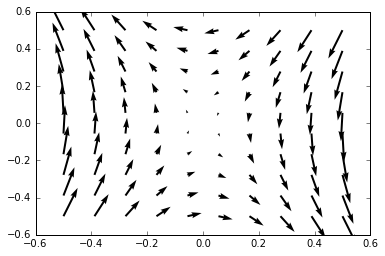

In [3]:
phase_behave(-1, -2)

Convergence rate fastest along $\underline{v}_2$

### $\lambda_2 > \lambda_1 > 0$:

We have an **unstable** mode.  

$\begin{cases}
    z_1 \rightarrow \infty \\
    z_2 \rightarrow \infty
\end{cases} \text{ as } t \rightarrow \infty \Rightarrow$  need to reverse the arrows:

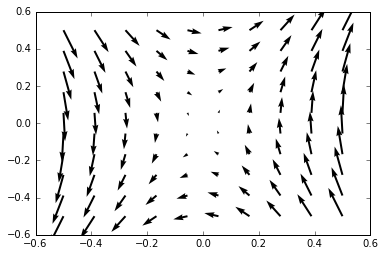

In [4]:
phase_behave(1, 2)

### $\lambda_2 < 0 < \lambda_1$ or ($\lambda_2 < 0$, $\lambda_1 > 0$):

We have here that:

$\begin{cases}
    z_1 \infty e^{\lambda_1 t} \rightarrow \infty \\
    z_2 \infty e^{\lambda_2 t} \rightarrow 0
\end{cases}
\text{ as } t \rightarrow \infty
\begin{cases}
    \lambda_2 \text{ is the }\underline{\text{stable}} \text{ e-value} \\
    \underline{v}_2 \text{ is the }\underline{\text{stable}} \text{ e-vector} \\
    \lambda_1 \text{ is the }\underline{\text{unstable}} \text{ e-value} \\
    \underline{v}_1 \text{ is the }\underline{\text{unstable}} \text{ e-vector}
\end{cases}$

Equation of the system in the $z$-plane is:

$z_2 = c_1\, z_1^{\lambda_2/\lambda_1}, \quad \lambda_1/\lambda_2 < 0$

The point is called $\underline{\text{saddle}}$.  Phase portrait:

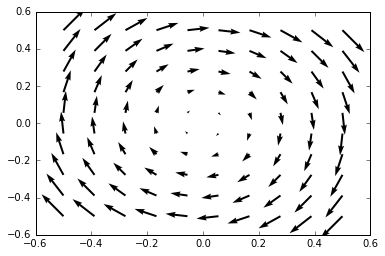

In [5]:
phase_behave(1, -1)

## Case 2: Complex e-values: $\lambda_{1,2} = \alpha \pm j\beta$

$\begin{cases}
    \dot{z}_1 = \alpha z_1 - \beta z_2 \\
    \dot{z}_2 = \alpha z_1 + \beta z_2
\end{cases}$

The system in $z$ coordinate is **coupled**.  Change of coordinates:

$\begin{cases}
    z_1 = r \cos \theta \\
    z_2 = r \sin \theta
\end{cases}$

### !!!!! TODO: Insert Graphic !!!!!

$\displaystyle\Rightarrow \begin{cases}
    \dot{r} \cos \theta - r \dot{\theta} \sin \theta = \alpha r \cos \theta - \beta r \sin \theta \\
    \dot{r} \sin \theta + r \dot{\theta} \cos \theta = \beta r \cos \theta + \alpha r \sin \theta
\end{cases}$

Multiply by $\cos \theta (\sin \theta)$ sum and substract:

$\begin{cases}
    \dot{r}(\cos^2 \theta) + \dot{r} (\sin^2 \theta) = \alpha r (\cos^2 \theta + \sin^2 \theta) \\
    - r \dot{\theta} ( \cos^2 \theta) - r \dot{\theta} (\sin^2 \theta) = - \beta r (\cos^2 \theta) - \beta r (\sin^2 \theta)
\end{cases}$

$\displaystyle\begin{cases}
    \dot{r} = \alpha r \\
    \dot{\theta} = \beta
\end{cases}
\Rightarrow \underline{\text{decoupled}} \Rightarrow 
\begin{cases}
    r(t) = r_0 e^{\alpha t} \\
    \theta(t) = \theta_0 + \beta t
\end{cases}$

Solution depends on $\alpha$ - value:

1. if $\alpha < 0 \Rightarrow r(t) \rightarrow 0 \text{ as } t \rightarrow \infty$
2. if $\alpha > 0 \Rightarrow r(t) \rightarrow \infty \text{ as } t \rightarrow \infty$
3. if $\alpha = 0 \Rightarrow r(t) = r_0, \forall t > 0$

### Cases:

#### 1 - Stable Focus:

##### !!!!! TODO: Insert Graphic !!!!!

#### 2 - Unstable Focus

##### !!!!! TODO: Insert Graphic !!!!!

#### 3 - Center

##### !!!!! TODO: Insert Graphic !!!!!!

# Qualitative Behavior Near Equillibrium Points

Non-Linear Systems (Autonomous)

$\underline{\dot{x}} = \underline{f}(\underline{x}) \quad \Rightarrow$ equilibria $\underline{x}^*$ such that $\underline{f}(\underline{x}^*) = \underline{0}$

Near $\underline{x}^*$ (in a neighbor), $\dot{\underline{x}} = \underline{f}(\underline{x})$ may take one of the patterns seen for linear systems:

* Stable/Unstable Nodes
* Stable/Unstable Focus
* Saddle Point
* Center

**Question:** Can we determine the type of equillibrium point via $\underline{\text{linearization}}$?

**Goal:** $\dot{\underline{x}} = \underline{f}(\underline{x}) \Longleftrightarrow \dot{\underline{x}} \approx A\underline{x}$ where $\displaystyle A = \left . \frac{\partial \underline{f}}{\partial \underline{x}} \right |_{\underline{x} = \underline{x}^*}$

## For a 2-D system we have:

$\begin{cases}
    \dot{x}_1 = f_1(x_1, x_2) \\
    \dot{x}_2 = f_2(x_1, x_2)
\end{cases}
\Rightarrow$ let $\underline{x}^* = (x_1^*, x_2^*)$ be an equillibrium point (i.e. $\underline{f}(\underline{x}^*) = \underline{0}$.  

If $\underline{f} = (f_1, f_2)$ is continous and differentiable we can expand in Taylor Series around $\underline{x}^*$:

$\begin{cases}
    \dot{x}_1 = f_1(x_1^*, x_2^*) + a_{11} (x_1 - x_1^*) + a_{12} (x_2 - x_2^*) + H.O.T \\
    \dot{x}_2 = f_2(x_1^*, x_2^*) + a_{21} (x_1 - x_1^*) + a_{22} (x_2 - x_2^*) + H.O.T
\end{cases}$

$\displaystyle a_{ij} = \left . \frac{\partial f_i}{\partial x_j} \right |_{x_1^*,\, x_2^*}$

But $\underline{x}^* = [x_1^*, x_2^*] \Rightarrow f_1 (x_1^*, x_2^*) = 0$ and $f_2(x_1^*, x_2^*) = 0$

Set $\partial x_1 = x_1 - x_1^*, \, \partial x_2 = x_2 - x_2^*$.  Then,

$\begin{cases}
    \partial\dot{x}_1 = a_{11} \partial x_1 + a_{12} \partial x_2 + H.O.T. \\
    \partial\dot{x}_2 = a_{21} \partial x_1 + a_{22} \partial x_2 + H.O.T. \\
\end{cases}$

## Linearized System:

$\dot{\underline{x}} = \underline{f}(\underline{x}) \rightarrow \partial \dot{\underline{x}} \approx A \partial \underline{x}$

Study the e-values of A to determine that nature of the equillibrium point for the original non-linear system. 

# Summary

Generally the analysis of the motion near an equillibrium point for a non-linear system can be done by looking at the behavior of the linearized system.  

## Steps:

1. Find the equillibrium points for $\dot{\underline{x}} = \underline{f}(\underline{x})$ (i.e. solve $\underline{f}(\underline{x}) = \underline{0}$). 
2. For each equillibrium point, linearize the system and find the qualitative behavior of the system near the equillibrium.  
3. Sketch the behavior on the phase plane near the equillibrium points.
4. Connect the trajectories to have an idea of the global behavior.
